In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

store = pd.read_csv('..\data\shops.csv')
store.head()

,store_name,area,month_sale,risk_value
0,Hey Juice茶桔便（东绛店）,滨湖区,3016,0.840345
1,偶俚咯生鲜驿站,滨湖区,3016,0.843320
2,华润万家（无锡中南店）,滨湖区,3008,0.822817
3,卤江南（金科世界城店）,滨湖区,2983,0.826659
4,又卷烧饼（湖滨商业街店）,滨湖区,3658,0.904026


In [2]:
store_del = store.drop(['store_name','area'],axis=1)

In [3]:
# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(store_del['month_sale'],store_del['risk_value'],test_size=0.2)

# 使用array重构数据。如果你的数据只有一个特性或数组，则重新整形(- 1,1)
# 如果包含单个样本，则对(1，-1)进行整形。
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [4]:
# 实例化模型
linreg = linear_model.LinearRegression()

# 拟合
linreg.fit(X_train,y_train)

print(linreg.intercept_) # 截距
print(linreg.coef_) # 系数

[0.58300593]
[[9.92327903e-05]]


In [5]:
pre = linreg.predict(X_test) # 预测结果
pre[:5]

array([[0.8870552 ],
       [0.84617129],
       [0.95026649],
       [0.93835856],
       [0.88983372]])

In [6]:
# 真实结果
y_test[:5]

array([[0.90213428],
       [0.82557046],
       [0.97741647],
       [0.94744032],
       [0.93114903]])

In [7]:
# 第三步 评价结果
print('次方', 2 ** 5)
print('平方和计算', np.mean(y_test - pre) ** 2)
print('系数', linreg.coef_)
print('截距', linreg.intercept_)
print('方差', linreg.score(X_test, y_test))


次方 32
平方和计算 1.7015076414593537e-05
系数 [[9.92327903e-05]]
截距 [0.58300593]
方差 0.5294379776239047


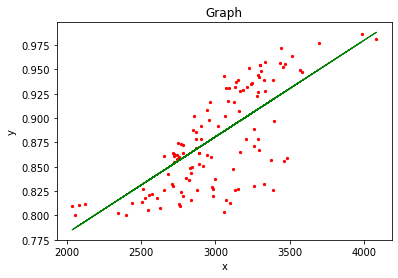

In [8]:
plt.title('Graph')
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(X_test,y_test,color='r',s=5)
plt.plot(X_test,pre,'g-',linewidth=1)
# for idx,m in enumerate(X_test):
#     plt.plot([m,m],[y_test[idx],pre[idx]],'r-')
plt.show()